In [82]:
! pip install catboost

In [127]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.6 MB/s eta 0:00:00


In [131]:
import pandas as pd
import sklearn as linear_model
import sklearn.model_selection as train_test_split
import sklearn.preprocessing as LabelEncoder
import seaborn as sns

In [132]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [133]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [134]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x =='male' else 0)

In [136]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,train_size=0.8,random_state=42)
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [153]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Ticket'] = le.fit_transform(df['Ticket'])
train['Ticket'] = le.fit_transform(train['Ticket'])
val['Ticket'] = le.fit_transform(val['Ticket'])
test['Ticket'] = le.fit_transform(test['Ticket'])

In [138]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,275,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,85,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,395,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,344,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,132,30.0708,NaN,C


In [139]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

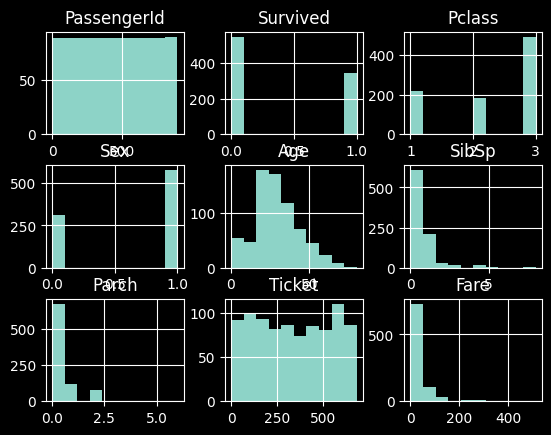

In [140]:
df.hist()

In [141]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [142]:
len(df)

891

In [143]:
len(test)

90

In [144]:
len(train)

712

In [145]:
len(val)

89

In [146]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [147]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",1,45.5,0,0,15,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",1,23.0,0,0,188,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",1,32.0,0,0,543,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,332,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,277,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,245,7.6500,NaN,S
270,271,0,1,"Cairns, Mr. Alexander",1,NaN,0,0,39,31.0000,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,333,14.1083,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",0,14.0,1,2,27,120.0000,B96 B98,S


In [148]:
val

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
819,820,0,3,"Skoog, Master. Karl Thorsten",1,10.0,3,2,43,27.9000,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",1,20.0,0,0,60,9.2250,NaN,S
777,778,1,3,"Emanuel, Miss. Virginia Ethel",0,5.0,0,0,52,12.4750,NaN,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",0,29.0,0,0,67,10.5000,F33,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",0,41.0,0,2,57,20.2125,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,1,1,"Ryerson, Miss. Emily Borie",0,18.0,2,2,73,262.3750,B57 B59 B63 B66,C
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",0,40.0,1,1,30,39.0000,NaN,S
344,345,0,2,"Fox, Mr. Stanley Hubert",1,36.0,0,0,18,13.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",1,61.0,0,0,56,32.3208,D50,S


In [149]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
357,358,0,2,"Funk, Miss. Annie Clemmer",0,38.0,0,0,17,13.0000,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",1,42.0,1,0,8,52.5542,D19,S
772,773,0,2,"Mack, Mrs. (Mary)",0,57.0,0,0,81,10.5000,E77,S
527,528,0,1,"Farthing, Mr. John",1,NaN,0,0,73,221.7792,C95,S
767,768,0,3,"Mangan, Miss. Mary",0,30.5,0,0,54,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
590,591,0,3,"Rintamaki, Mr. Matti",1,35.0,0,0,85,7.1250,NaN,S
63,64,0,3,"Skoog, Master. Harald",1,4.0,3,2,41,27.9000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",1,21.0,2,0,82,73.5000,NaN,S
231,232,0,3,"Larsson, Mr. Bengt Edvin",1,29.0,0,0,39,7.7750,NaN,S


# **CatBoostRegressor**

In [150]:
X = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare']

cat_features = []

y = ['Survived']

In [151]:
model = CatBoostRegressor(cat_features=cat_features,
                          early_stopping_rounds=200,
                          learning_rate = 0.1,
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100)

In [154]:
model.fit(train[X], train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4514504	test: 0.4743024	best: 0.4743024 (0)	total: 4.73ms	remaining: 4.73s
100:	learn: 0.1990794	test: 0.2676790	best: 0.2617787 (72)	total: 315ms	remaining: 2.8s
200:	learn: 0.1550874	test: 0.2681954	best: 0.2593356 (127)	total: 423ms	remaining: 1.68s
300:	learn: 0.1262339	test: 0.2724831	best: 0.2593356 (127)	total: 537ms	remaining: 1.25s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2593355783
bestIteration = 127

Shrink model to first 128 iterations.


In [155]:
test['pred'] = model.predict(test[X])
train['pred'] = model.predict(train[X])
val['pred'] = model.predict(val[X])

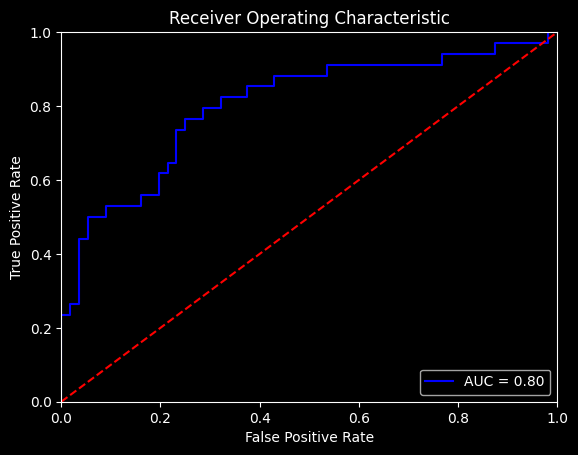

In [156]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Survived'], test['pred'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred
331,332,0,1,"Partner, Mr. Austen",1,45.5,0,0,15,28.5000,C124,S,0.163563
733,734,0,2,"Berriman, Mr. William John",1,23.0,0,0,188,13.0000,NaN,S,0.045818
382,383,0,3,"Tikkanen, Mr. Juho",1,32.0,0,0,543,7.9250,NaN,S,0.443864
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,332,7.8542,NaN,S,0.091791
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,277,31.2750,NaN,S,0.089903
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.0,0,1,481,247.5208,B58 B60,C,0.020943
536,537,0,1,"Butt, Major. Archibald Willingham",1,45.0,0,0,16,26.5500,B38,S,0.203152
361,362,0,2,"del Carlo, Mr. Sebastiano",1,29.0,1,0,520,27.7208,NaN,C,0.123150
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,301,7.8958,NaN,S,0.104794
55,56,1,1,"Woolner, Mr. Hugh",1,NaN,0,0,78,35.5000,C52,S,0.667069


In [107]:
PassengerId = int(input('Идентификатор пассажира: '))
Pclass = int(input('Класс(1,2,3): '))
Sex = float(input('Пол(муж-1, жен-0): '))
Age = int(input('Возраст: '))
SibSp = int(input('Количество братьев и сестер/супругов на борту Титаника: '))
Parch = int(input('Количество родителей/детей на борту Титаника: '))
Ticket = int(input('Номер билета: '))
Fare = float(input('Пассажирский тариф (стоимость билета): '))

preds = [PassengerId, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare]

preds = model.predict(preds)
print(f"Шанс того что вы выжите на титанике {preds}")

if preds > 0.5:
  print("Вы выжите")

else:
  print("Вы не выжите")

Идентификатор пассажира: 123
Класс(1,2,3): 1
Пол(муж-1, жен-0): 1
Возраст: 7
Количество братьев и сестер/супругов на борту Титаника: 0
Количество родителей/детей на борту Титаника: 0
Номер билета: 123
Пассажирский тариф (стоимость билета): 40
Шанс того что вы выжите на титанике 0.44220518665234976
Вы не выжите


--------------------------------------------------

In [158]:
import shap
shap.initjs()

In [159]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [161]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

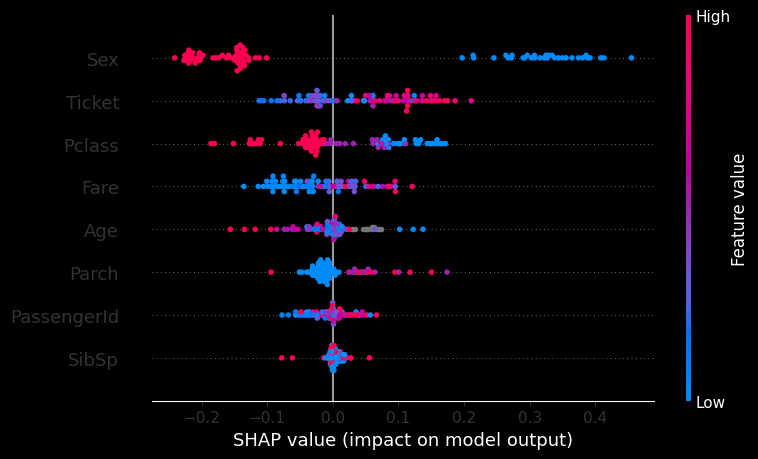

In [163]:
shap.summary_plot(shap_values, test[X])

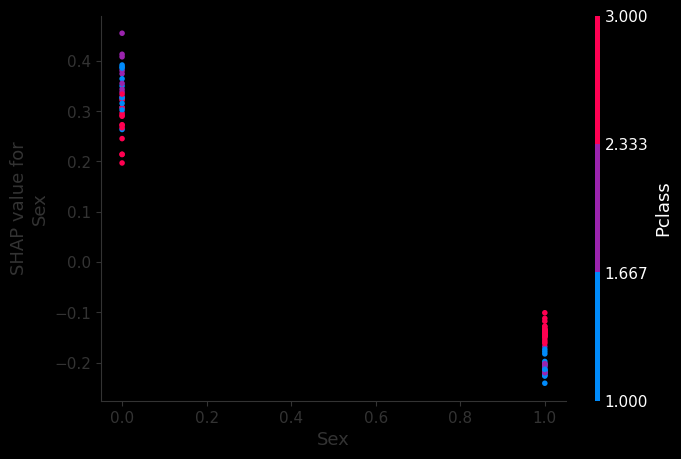

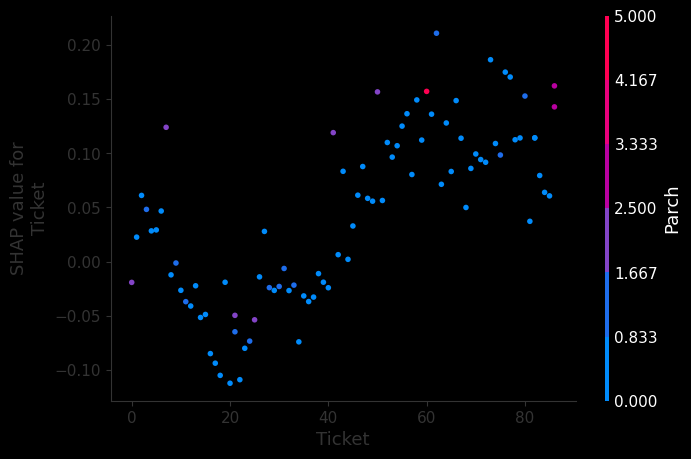

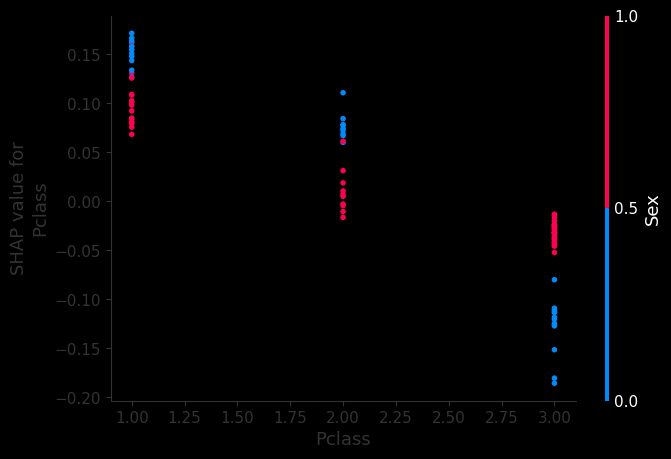

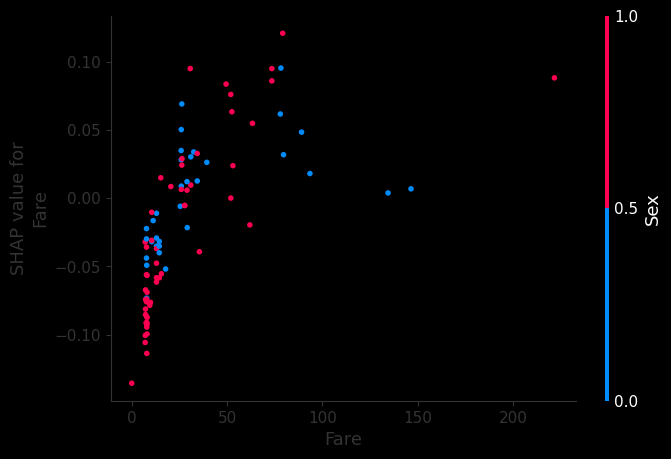

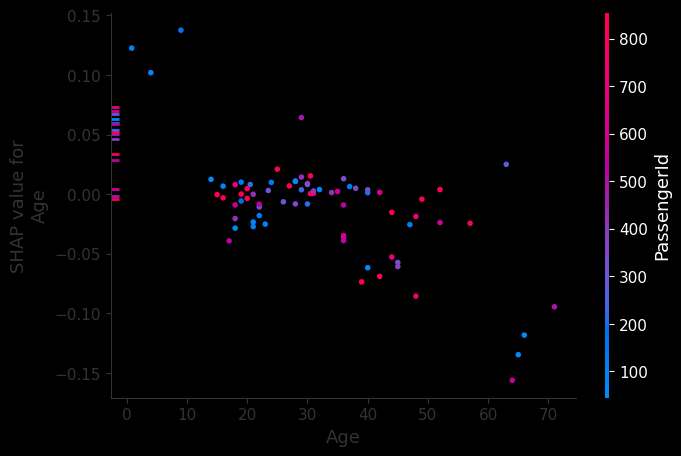

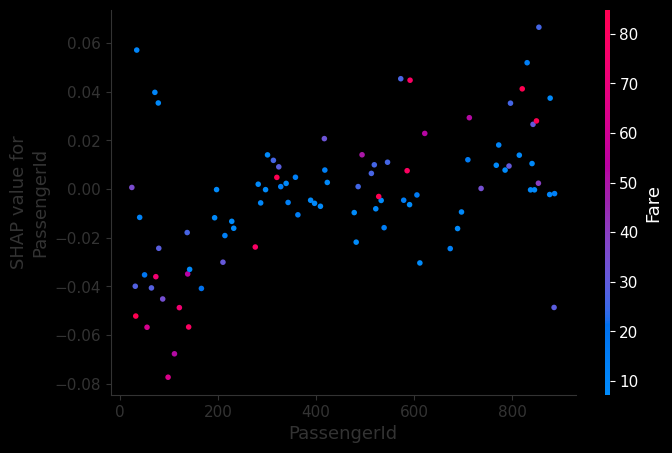

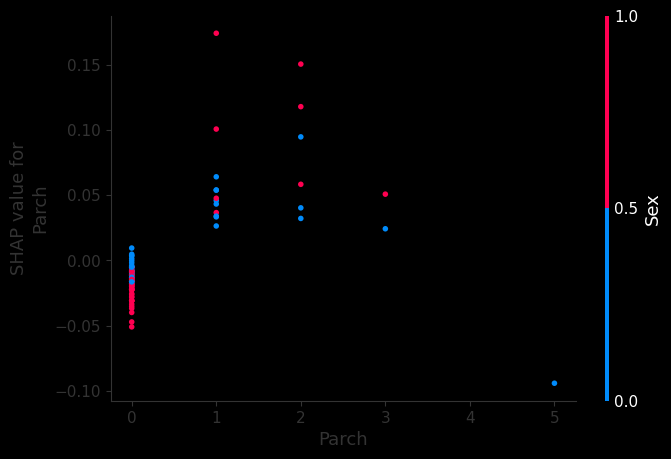

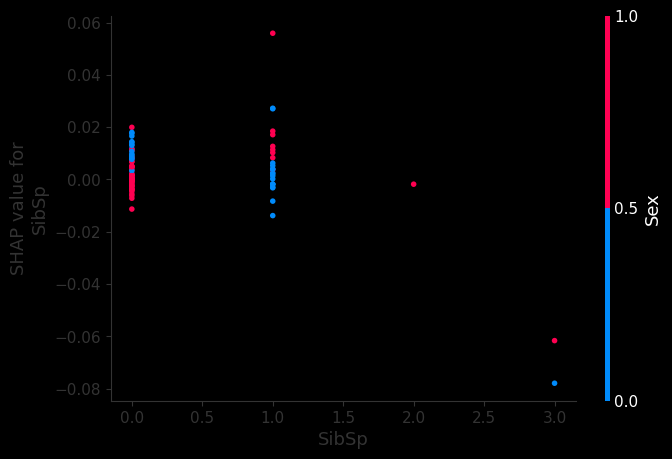

In [162]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])

In [164]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [165]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [166]:
error(train['Survived'],train['pred'])

0.18499996785415046
408326814938232.8


In [167]:
train['error'] = train['Survived'] - train['pred']

In [168]:
train['error'] = abs(train['error'])

<Axes: >

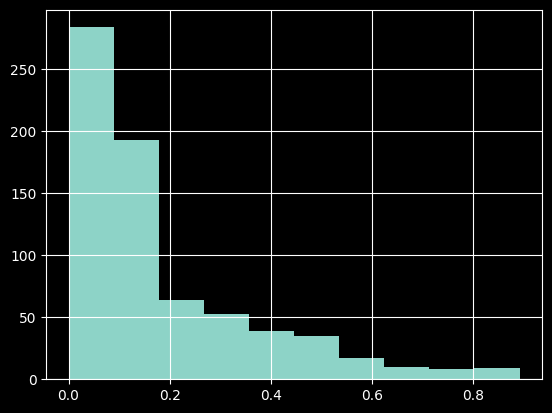

In [169]:
train['error'].hist()

# **CatBoostClassifier**

In [170]:
X = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare']

cat_features = []

y = ['Survived']

In [171]:
model = CatBoostClassifier(cat_features=cat_features,
                          early_stopping_rounds=200,
                          learning_rate = 0.1,
                          eval_metric='Accuracy',
                          random_seed=42,
                          verbose=100)

In [172]:
model.fit(train[X], train[y],eval_set=(val[X],val[y]))

0:	learn: 0.8146067	test: 0.6404494	best: 0.6404494 (0)	total: 3.89ms	remaining: 3.89s
100:	learn: 0.9480337	test: 0.8426966	best: 0.8651685 (6)	total: 177ms	remaining: 1.58s
200:	learn: 0.9873596	test: 0.8314607	best: 0.8651685 (6)	total: 341ms	remaining: 1.36s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8651685393
bestIteration = 6

Shrink model to first 7 iterations.


In [173]:
test['pred'] = model.predict(test[X])
train['pred'] = model.predict(train[X])
val['pred'] = model.predict(val[X])

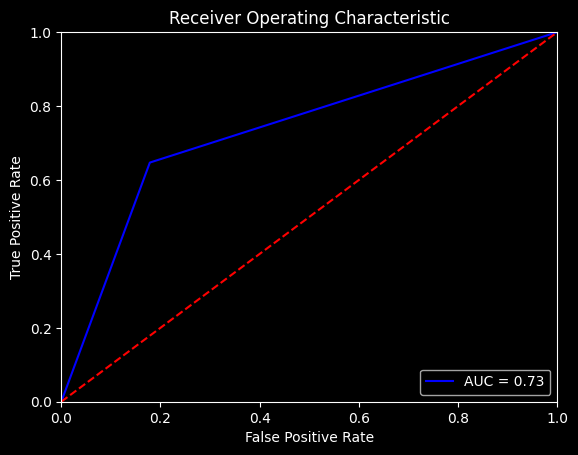

In [174]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Survived'], test['pred'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [175]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred,error
331,332,0,1,"Partner, Mr. Austen",1,45.5,0,0,15,28.5000,C124,S,0,0.163563
733,734,0,2,"Berriman, Mr. William John",1,23.0,0,0,188,13.0000,NaN,S,0,0.045818
382,383,0,3,"Tikkanen, Mr. Juho",1,32.0,0,0,543,7.9250,NaN,S,0,0.443864
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,332,7.8542,NaN,S,0,0.091791
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.0,4,2,277,31.2750,NaN,S,0,0.089903
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.0,0,1,481,247.5208,B58 B60,C,0,0.020943
536,537,0,1,"Butt, Major. Archibald Willingham",1,45.0,0,0,16,26.5500,B38,S,0,0.203152
361,362,0,2,"del Carlo, Mr. Sebastiano",1,29.0,1,0,520,27.7208,NaN,C,0,0.123150
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,301,7.8958,NaN,S,0,0.104794
55,56,1,1,"Woolner, Mr. Hugh",1,NaN,0,0,78,35.5000,C52,S,0,0.332931


In [176]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [177]:
error(train['Survived'],train['pred'])

0.1601123595505618
183433130890090.53


In [178]:
train['error'] = train['Survived'] - train['pred']

In [179]:
train['error'] = abs(train['error'])

<Axes: >

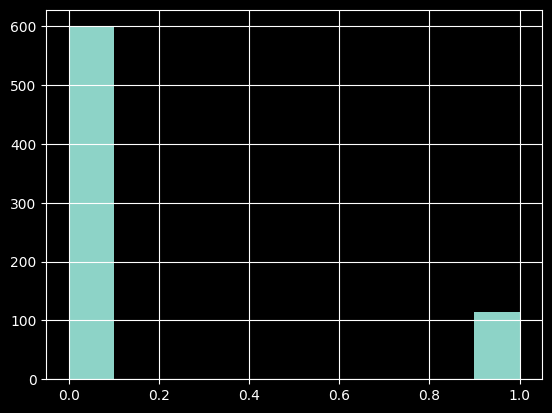

In [180]:
train['error'].hist()

In [181]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pred,error
331,332,0,1,"Partner, Mr. Austen",1,45.50,0,0,15,28.5000,C124,S,0,0
733,734,0,2,"Berriman, Mr. William John",1,23.00,0,0,188,13.0000,NaN,S,0,0
382,383,0,3,"Tikkanen, Mr. Juho",1,32.00,0,0,543,7.9250,NaN,S,0,0
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.00,1,0,332,7.8542,NaN,S,0,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.00,4,2,277,31.2750,NaN,S,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.00,0,1,481,247.5208,B58 B60,C,0,0
536,537,0,1,"Butt, Major. Archibald Willingham",1,45.00,0,0,16,26.5500,B38,S,0,0
361,362,0,2,"del Carlo, Mr. Sebastiano",1,29.00,1,0,520,27.7208,NaN,C,0,0
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,301,7.8958,NaN,S,0,0
55,56,1,1,"Woolner, Mr. Hugh",1,NaN,0,0,78,35.5000,C52,S,0,1


In [126]:
PassengerId = int(input('Идентификатор пассажира: '))
Pclass = int(input('Класс(1,2,3): '))
Sex = float(input('Пол(муж-1, жен-0): '))
Age = int(input('Возраст: '))
SibSp = int(input('Количество братьев и сестер/супругов на борту Титаника: '))
Parch = int(input('Количество родителей/детей на борту Титаника: '))
Ticket = int(input('Номер билета: '))
Fare = float(input('Пассажирский тариф (стоимость билета): '))

preds = [PassengerId, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare]

preds = model.predict(preds)
print(f"Шанс того что вы выжите на титанике {preds}")

if preds > 0.5:
  print("Вы выжите")

else:
  print("Вы не выжите")

Идентификатор пассажира: 4321
Класс(1,2,3): 1
Пол(муж-1, жен-0): 1
Возраст: 19
Количество братьев и сестер/супругов на борту Титаника: 2
Количество родителей/детей на борту Титаника: 1
Номер билета: 123
Пассажирский тариф (стоимость билета): 35
Шанс того что вы выжите на титанике 0
Вы не выжите


In [182]:
import shap
shap.initjs()

In [183]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [184]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

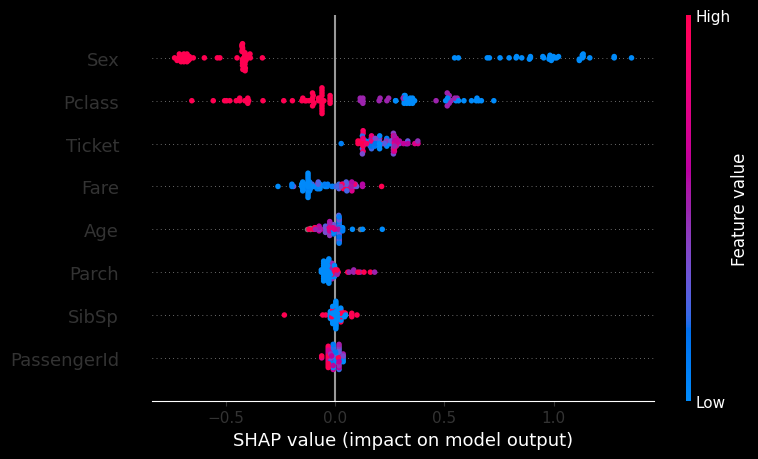

In [185]:
shap.summary_plot(shap_values, test[X])

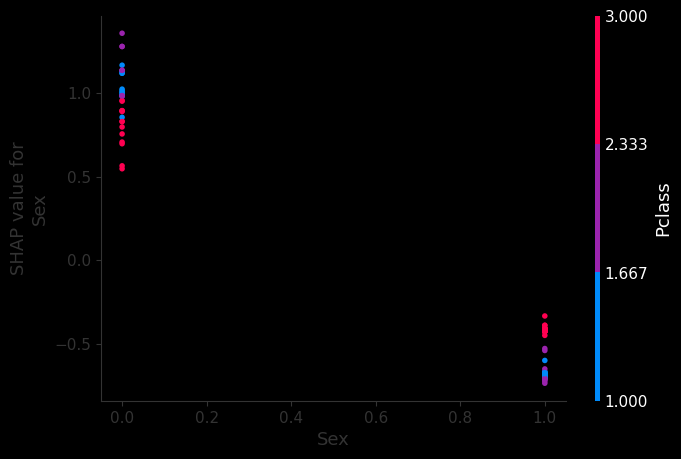

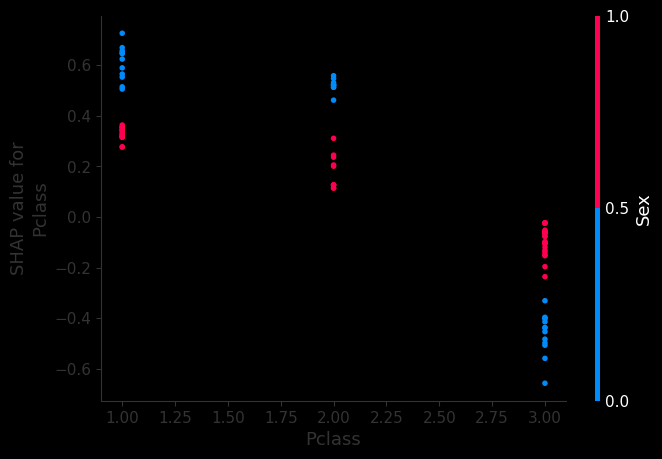

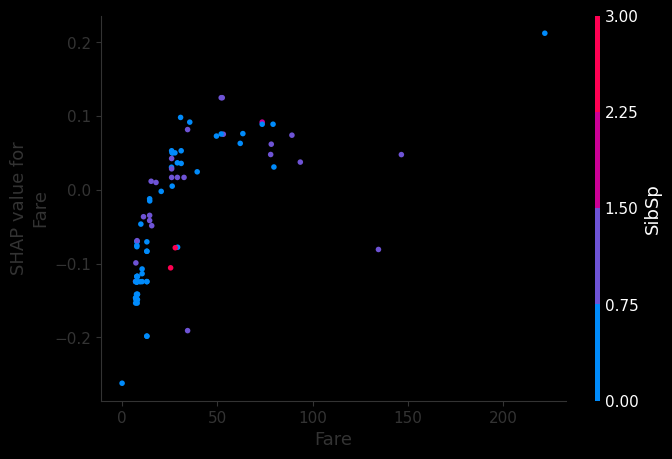

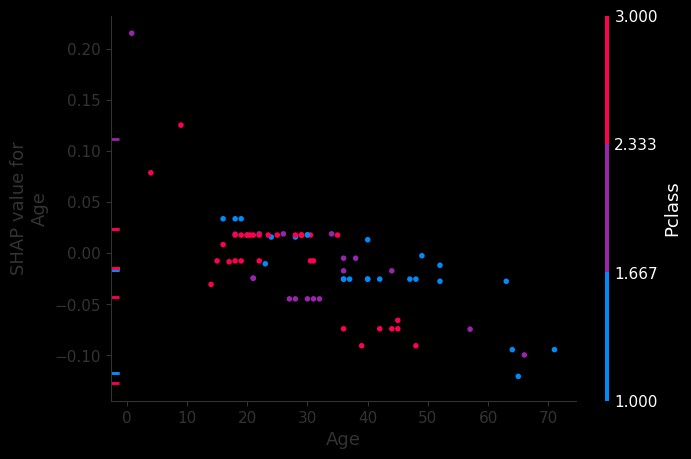

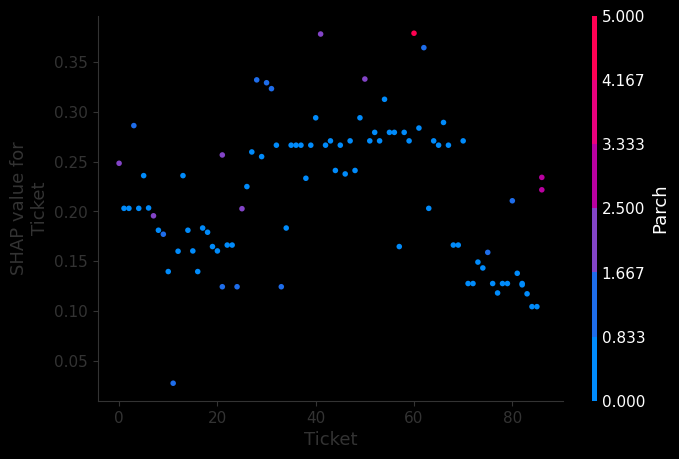

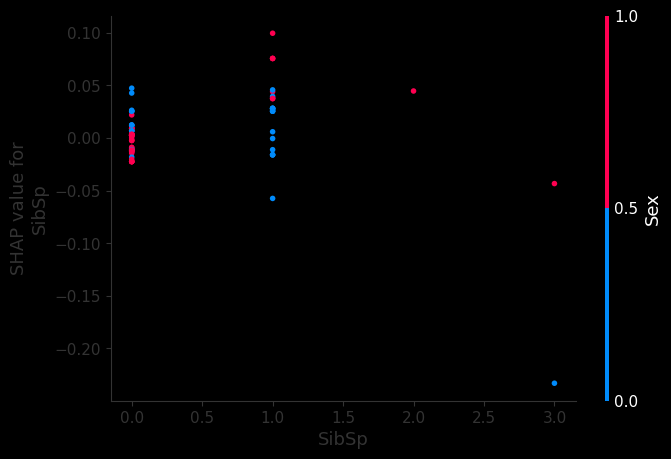

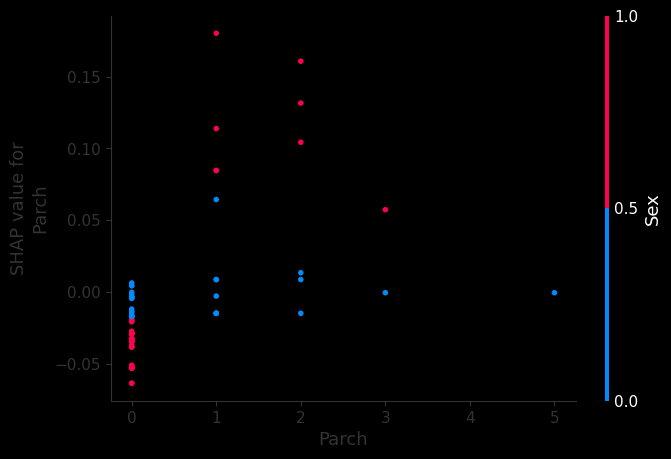

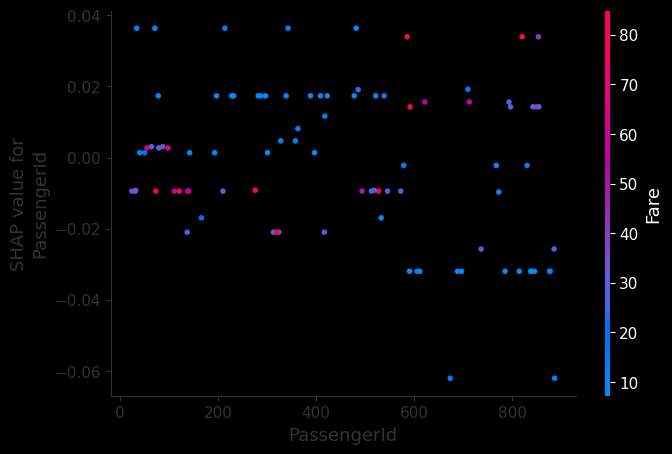

In [186]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])